# **Predicting Medical Insurance Costs with Linear Regression**

Healthcare costs are a significant concern for individuals, families, and healthcare providers alike. Understanding the factors that influence medical insurance costs can aid in financial planning and policy-making decisions. In this notebook, I'll explore how various characteristics of patients, such as age, BMI, smoking habits, and region, correlate with their medical insurance charges.

I'll use a fundamental yet powerful statistical technique called linear regression to model the relationship between these patient attributes and their insurance costs. Linear regression allows us to make predictions based on the linear relationship between the independent variables (patient characteristics) and the dependent variable (medical insurance charges).

## **What is Linear Regression?**

Linear regression is a type of predictive analysis used for modelling the relationship between a continuous numerical target variable and one or more independent variables. Linear regression is generally used for two things:
- Predicting a dependent variable from one or more independent variables
- Determining which values of the independents variables are predictors of the dependent variable

In linear regression, the relationship between the independent and dependent variables is shown using a linear model. An example of a linear model is y=mx+c, where y is the value of the dependent variable, x is the value of the independent variable, c is the intercept and m is the slope.

There are two types of linear regression models:
- Simple linear regression is a type of linear regression that deals with a single independent variable. 
- Multiple linear regression deals with two or more independent variables

***Criteria for Linear Regression***

In order to use Linear Regression:
- The purpose must be to predict the dependent variable from independent variables.
- The dependent variable being predicted must be of a continuous numeric data type.

Other criteria include:
- **Linearity** The dependent variable must have a linear relationship with the independent variable(s).
- **Independence ** Residuals not have multicollinearity.
- **Normality** Residuals must be normally distributed.
- **Homoscendastity** Residuals must have a constant variance or standard deviation from the mean for each x value.
- **Mean of Residuals is 0** 
-**No Autocorrelation**

## Dataset

I'll be using a [dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) containing information about patients, including their age, sex, BMI, number of children, smoking habits, and region, along with their corresponding medical insurance costs. This dataset provides a rich source of information for training my predictive model.

## Objective

The primary objective of this project is to develop a predictive model that accurately estimates medical insurance costs based on patient characteristics. By understanding how different factors contribute to insurance expenses, individuals and healthcare providers can make informed decisions regarding insurance coverage, pricing, and risk assessment.

## Methodology

I'll follow these key steps throughout our analysis:

1. **Data Exploration**: I'll start by exploring the dataset to understand its structure, identify any missing values, and gain insights into the distributions of variables.
   
2. **Data Preprocessing**: Before training our model, I'll pre-process the data by handling missing values, encoding categorical variables, and scaling numerical features as necessary.
   
3. **Data Splitting**: I'll split our dataset into training and test data.
   
4. **Model Fitting**: Using linear regression, I'll train our model on the preprocessed training dataset, aiming to minimize the difference between predicted and actual insurance costs.

5. **Prediction**: I'll use our trained model to make predictions on new data, enabling me to estimate medical insurance costs for patients based on their characteristics.
   
6. **Model Evaluation**: I'll evaluate the performance of our trained model using appropriate metrics and techniques to ensure its predictive accuracy and generalization to unseen data. These metrics include R2 Metric, Mean Square Error (MSE), and Mean Absolute Error (MAE)

By the end of this notebook, you'll have an understanding of how linear regression can be applied to predict medical insurance costs and insights into the factors influencing these expenses.

Let's dive in! 

# Import Libraries

I'll be importing the Python Libraries: Numpy, Pandas, Seaborn, Matplotlib and Sklearn

*   I'll use Pandas for importing the data and working with data frames
*   Numpy is for Numerical Calculations

*   Seaborn and Matplotlib will be used for Creating Plots
*   Sklearn will be used for modeling the data










In [710]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Import Data

The original source of this data set is: https://www.kaggle.com/datasets/mirichoi0218/insurance

I'll start off by importing the dataset and converting it to a Pandas DataFrame, df. This will make it easier to work with in pandas.

In [711]:
df =pd.read_csv("insurance.csv")

Let's see how the dataset looks like. Applying df.head(), we can see the first five rows of the data set:

In [712]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset has six columns:


*   age
*   sex


*   bmi
*   children

*   smoker
*   region

*   charges

Charges is the Target Variable.

Age, sex, bmi, children, smoker, region are the independent Variables.

The aim of this dataset is to predict the medical insurance charges for each customer, based on their features, namely, their age, sex, bmi, the number of children they have, whether they smoke or not and the region in which they live.

This dataset is suitable for linear regression because the target variable is continuous numerical. There is s a linear relationship between the independent and dependent variables.
The mean of residuals is also 0. The data is not multicollinear. These meet the assumptions of linear regression.





# Exploratory Data Analysis

I will be inspecting this data to check for:
*   shape of the data 
*   missing data
*   duplicate values
*   inconsistent data
*   mixed data types
*   distribution of the data
*   outliers
*   relationships among variables











## Shape

Let's check how many rows and columns the dataset has:

In [713]:
df.shape


(1338, 7)

The dataset has 1338 rows and 7 columns

## Describe the Data

Let's check the properties of the data using `.describe()` method.

In [714]:
desc = df.describe().T
desc

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Let's look at these visually.

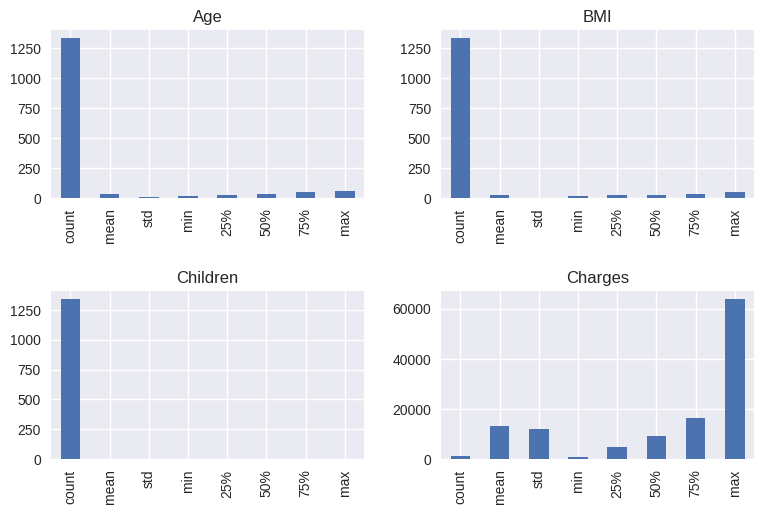

In [715]:
fig, ax=plt.subplots(2,2)
descT = desc.T

descT.age.plot(kind='bar', ax=ax[0,0])
ax[0,0].title.set_text('Age')

descT.bmi.plot(kind='bar', ax=ax[0,1])
ax[0,1].title.set_text('BMI')

descT.children.plot(kind='bar', ax=ax[1,0])
ax[1,0].title.set_text('Children')

descT.charges.plot(kind='bar', ax=ax[1,1])
ax[1,1].title.set_text('Charges')
fig.tight_layout(pad=2.0)

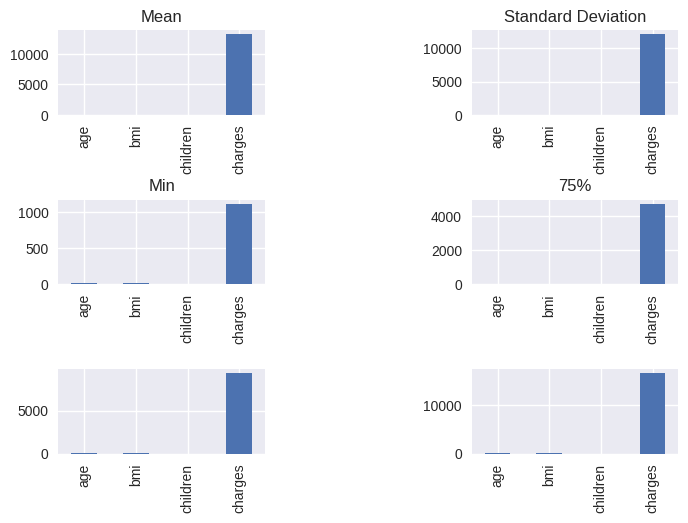

In [716]:
fig, ax=plt.subplots(3,2)
desc.drop("count", axis=1)
desc['mean'].plot(kind='bar', ax=ax[0,0])
ax[0,0].title.set_text('Mean')

desc['std'].plot(kind='bar', ax=ax[0,1])
ax[0,1].title.set_text('Standard Deviation')

desc['min'].plot(kind='bar', ax=ax[1,0])
ax[1,0].title.set_text('Min')

desc['25%'].plot(kind='bar', ax=ax[1,1])
ax[1,1].title.set_text('25%')

desc['50%'].plot(kind='bar', ax=ax[2,0])
ax[1,1].title.set_text('50%')

desc['75%'].plot(kind='bar', ax=ax[2,1])
ax[1,1].title.set_text('75%')


fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=1)

There is a very large range between the data values of the independent variable and target variables, so we'll need to scale the data.

## Check for Missing Values

Let's check if there are any missing values. We'll use `isnull().values.any()`. This will tell us if there are any missing values in the dataset.

In [717]:
df.isnull().values.any()

False

The Dataset has no missing values

## Check for Duplicate Values

Let's check if there are any duplicate values. We'll do this using the method .duplicated(). The method .duplicated() returns a series of true and false, depending on whether a particular row is duplicated or not. 

In [718]:
duplicate = df[df.duplicated()]
print(duplicate)


     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [719]:
duplicate.shape

(1, 7)

There is only 1 duplicate row. This will have to be removed.

## Check for Inconsistent Values




We will check if our categorical variables (region, smoker, and sex) have any inconsistent values.

For this we'll use the .unique() method.This method shows us each unique value in a series. It helps us identify inconsistent, misspelled or repetitive data.

In [720]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Text(0.5, 1.0, 'Regions')

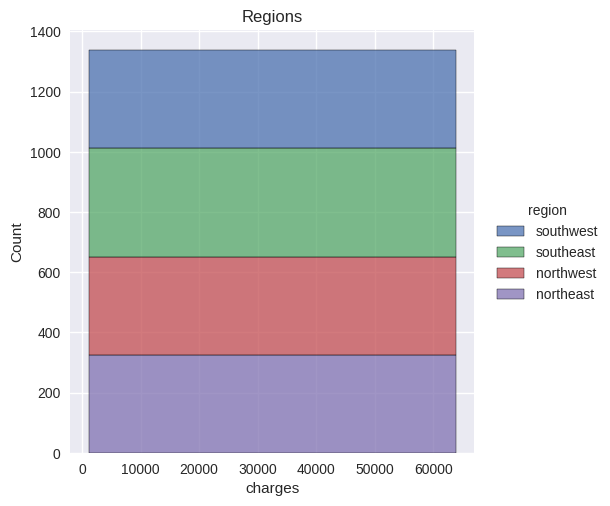

In [721]:
sns.displot(df, x="charges", hue='region', multiple='stack', bins=1)
plt.title("Regions")

In [722]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

Text(0.5, 1.0, 'Smoker')

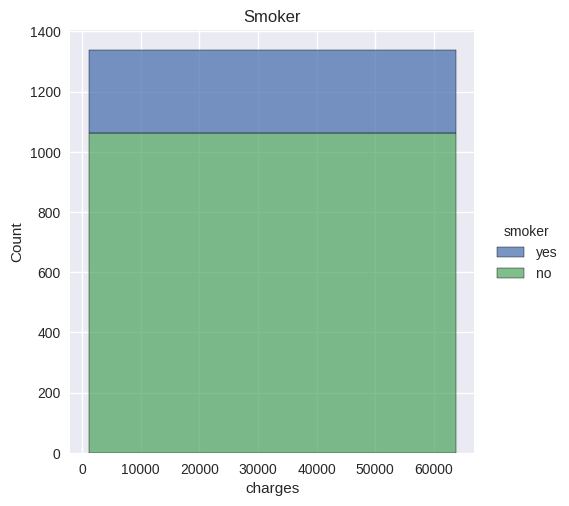

In [723]:
sns.displot(df, x="charges", hue='smoker', multiple='stack', bins=1)
plt.title("Smoker")

In [724]:
df.sex.unique()

array(['female', 'male'], dtype=object)

Text(0.5, 1.0, 'Sex')

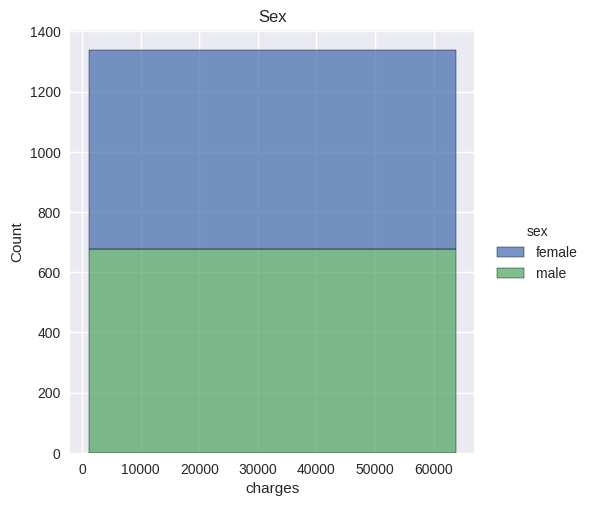

In [725]:
sns.displot(df, x="charges", hue='sex', multiple='stack', bins=1)
plt.title("Sex")

There appears to not be any inconsistent data.

## Check for mixed Datatypes

We'll check if there are any mixed datatypes in a single column.

In [726]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are no mixed data types in a single column.

However, the variables 'sex', 'smoker' and 'region' are categorical. We'll have to convert them to numerical data. 

## Check Distribution of the Data




Let's check how the data is distributed. We'll look at the following:
- The distributions of the Numerical Variables: 'age', 'bmi', 'children' and 'charges'
- The distributions of the categorical variables: 'sex', 'smoker' and 'region'

#### NUMERICAL DATA

We'll start off by checking the numerical variables: 'age', 'bmi', and 'charges'.

#### Age Column




Text(0.5, 1.0, 'Distribution of Age')

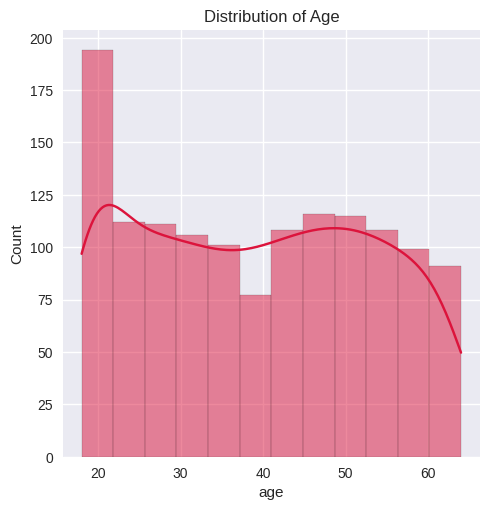

In [727]:
sns.displot(df.age, kde=True,linewidth=0.1, color="crimson")
plt.title("Distribution of Age")

This data appears to be right-skewed. Let's verify using the skew() method. 

*skew() is used to calculate the skewness of data. If the value of skew() is negative, then the data is left skewed, and if the value of skew() is positive, then the data is right skewed.

In [728]:
df.age.skew()

0.05567251565299186

The data is indeed skewed to the right. Although it is slightly right skewed.

#### BMI Column

Text(0.5, 1.0, 'Distribution of BMI')

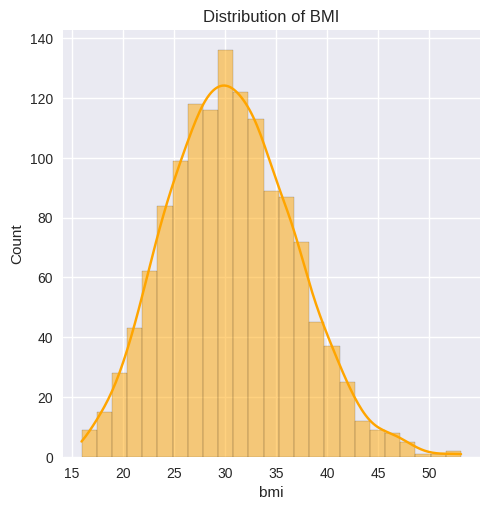

In [729]:
sns.displot(df.bmi, kde=True,linewidth=0.1, color="orange")
plt.title("Distribution of BMI")

This data appears to be normal. But let's verify using the skew() method.

In [730]:
df.bmi.skew()

0.2840471105987448

The data is actually right skewed, and not normal as previously thought. There is a possibility that the data could have outliers.

#### Charges Column

Text(0.5, 1.0, 'Distribution of Charges')

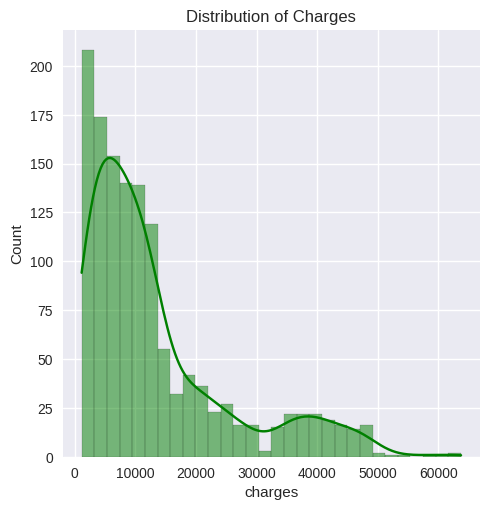

In [731]:
import matplotlib.pyplot as plt
sns.displot(df.charges, kde=True,linewidth=0.1, color='g')
plt.title("Distribution of Charges")

In [732]:
df.charges.skew()

1.5158796580240388

The data is extremely skewed to the right. This means that the majority of instances in the data occur on the right side of the graph. 
This suggests that there could be outliers in the data.

#### Children Column

The 'children' column is discrete data, so its distribution is shown using a bar plot

Text(0.5, 1.0, 'Distribution of Number of Children')

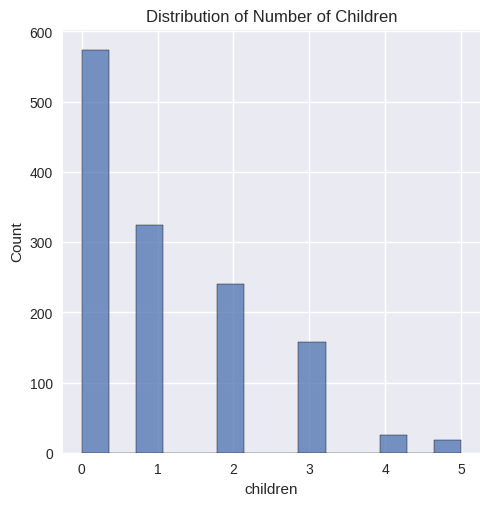

In [733]:
import matplotlib.pyplot as plt
sns.displot(df.children)
plt.title("Distribution of Number of Children")

Most customers don't have any children.

#### CATEGORICAL DATA

I'll use countplots to visualize categorical data.

#### Sex Variable

<Figure size 1000x700 with 0 Axes>

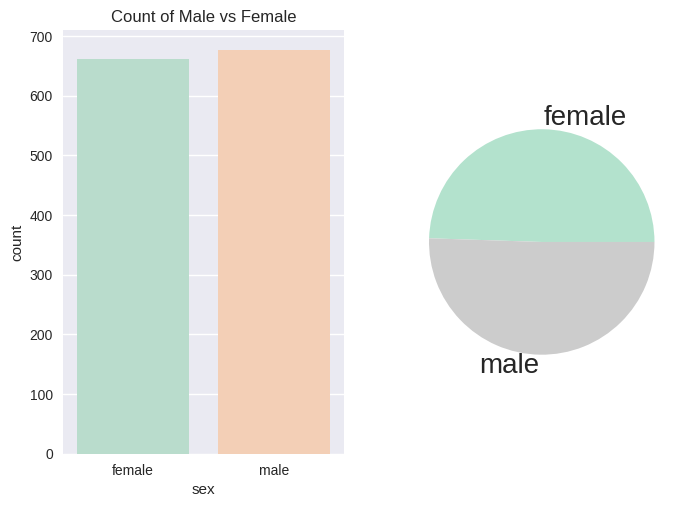

In [734]:
fig = plt.figure(figsize =(10, 7))
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.countplot(data=df, x='sex', palette='Pastel2', ax=ax1)
df.groupby('sex').size().plot(kind='pie', textprops={'fontsize': 20},
                              cmap='Pastel2', ax=ax2)
ax1.title.set_text("Count of Male vs Female")

There is an almost equal distribution of male and female customers.

#### Smoker Variable

<Axes: xlabel='smoker', ylabel='count'>

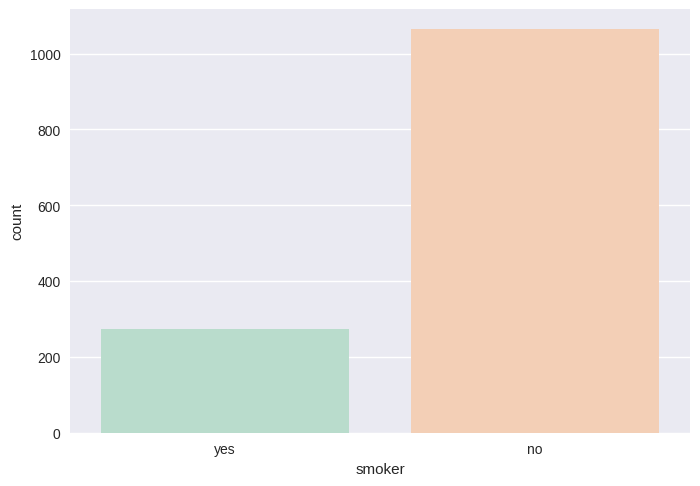

In [735]:
sns.countplot(data=df, x='smoker', palette='Pastel2')

There is a high number of customers who are non-smokers compared to those that are smokers.

#### Region Variable

<Axes: xlabel='region', ylabel='count'>

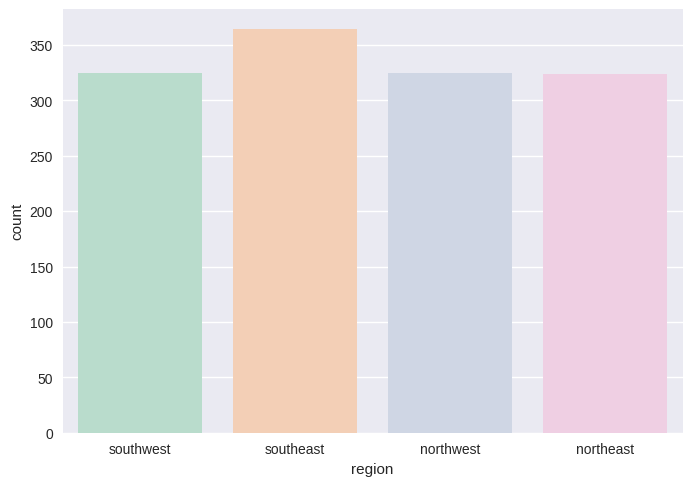

In [736]:
sns.countplot(data=df, x='region', palette='Pastel2')

There is an almost equal distribution of regions. An equal proportion of customers comes from each region.

## Check for Outliers

We'll check for outliers by using a box plot. Boxplots help us see outliers, as shown by the hollow circles.

<function matplotlib.pyplot.show(close=None, block=None)>

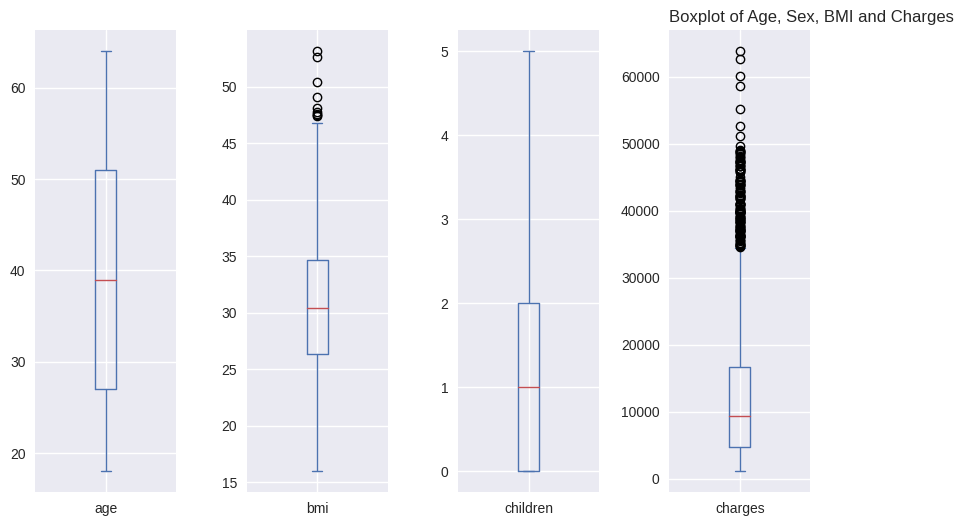

In [737]:
df.plot(kind='box',subplots=True, sharey=False, figsize=(10,6))
plt.subplots_adjust(wspace=0.5)
plt.title("Boxplot of Age, Sex, BMI and Charges", loc='left')
plt.show



*   The 'bmi' and 'charges' columns both have outliers, as previously suspected from their skewedness. These may have to be removed after further analysis.
*   The 'age' column is the closest to having a normal distribution, and as shown it its boxplot, it has no outliers. 




## Relationships Between Variables

### Numerical variables

Relationships in numerical data using a pairplot

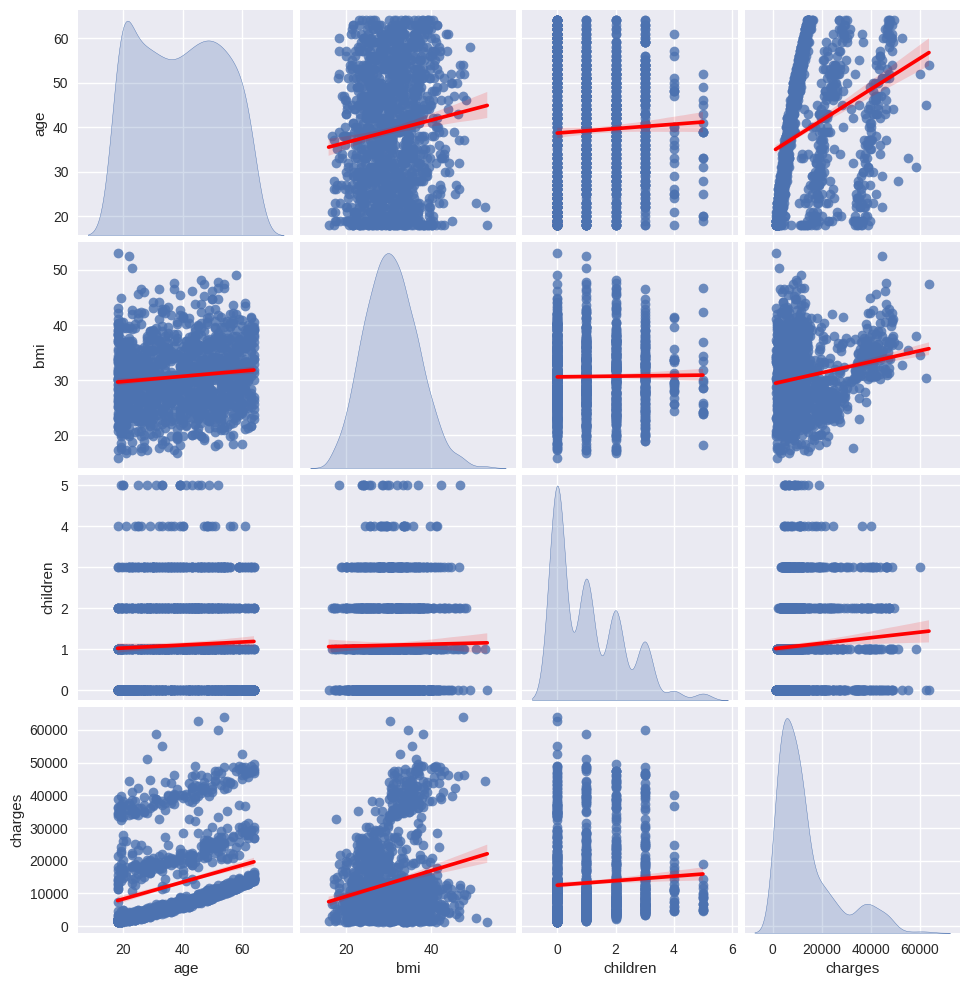

In [738]:
sns.pairplot(data=df, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})


From this, we can see that:
- There is a positive relationship between age and bmi. Age likely affects bmi
- There is no relationship between bmi and children. 
- There is a slight relationship between age and children. The number of children does not affect bmi or age. But the number of children may increase depending on age.

Using a Regression Plot

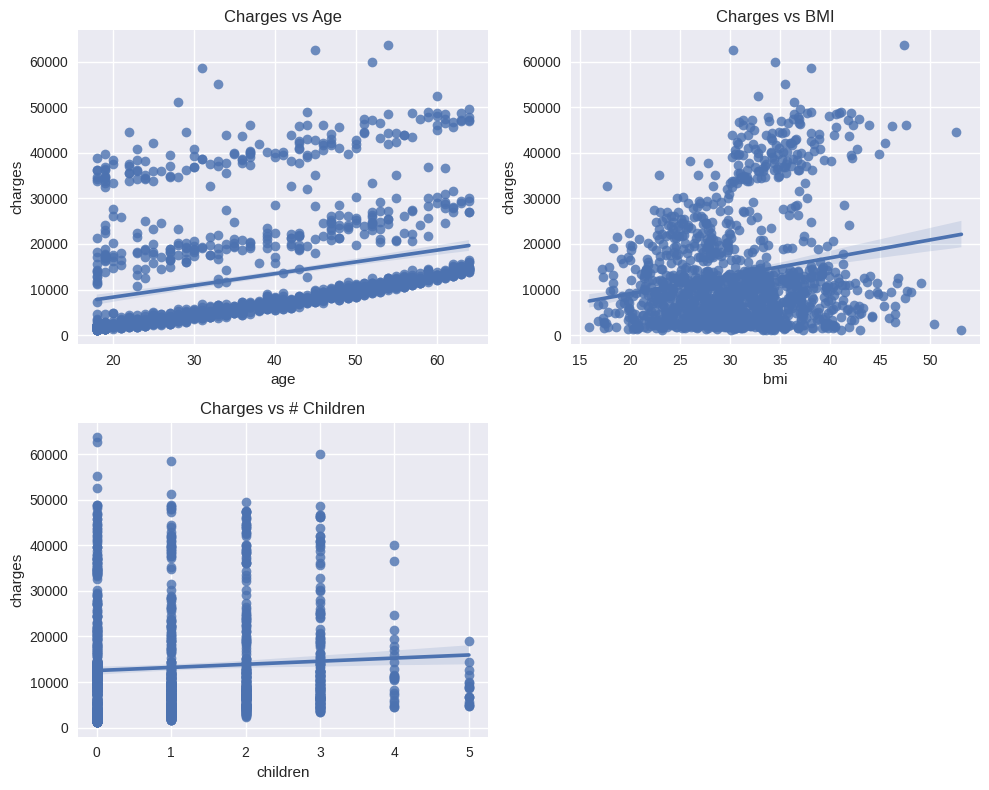

In [739]:
fig = plt.figure(figsize = (10,8))

plt.subplot(221)
plt.title('Charges vs Age')
sns.regplot(x=df.age,y=df.charges,data=df)

plt.subplot(222)
plt.title('Charges vs BMI')
sns.regplot(x=df.bmi,y=df.charges,data=df)

plt.subplot(223)
plt.title('Charges vs # Children')
sns.regplot(x=df.children,y=df.charges)

plt.tight_layout()
plt.show()

Looking at the relationships between numerical variables, 'age', 'bmi' and 'children' and the target variable, 'charges', we can see that:
- There is a slight positive relationship between age and charges. The customers age plays a factor in their charges
- There is a moderate relationship between bmi and charges. The customer's bmi plays a factor in their charges
- There is no relationship between number of children and charges. 

### Categorical Variables

I'll be using countplots to see the relationship between categorical variables.

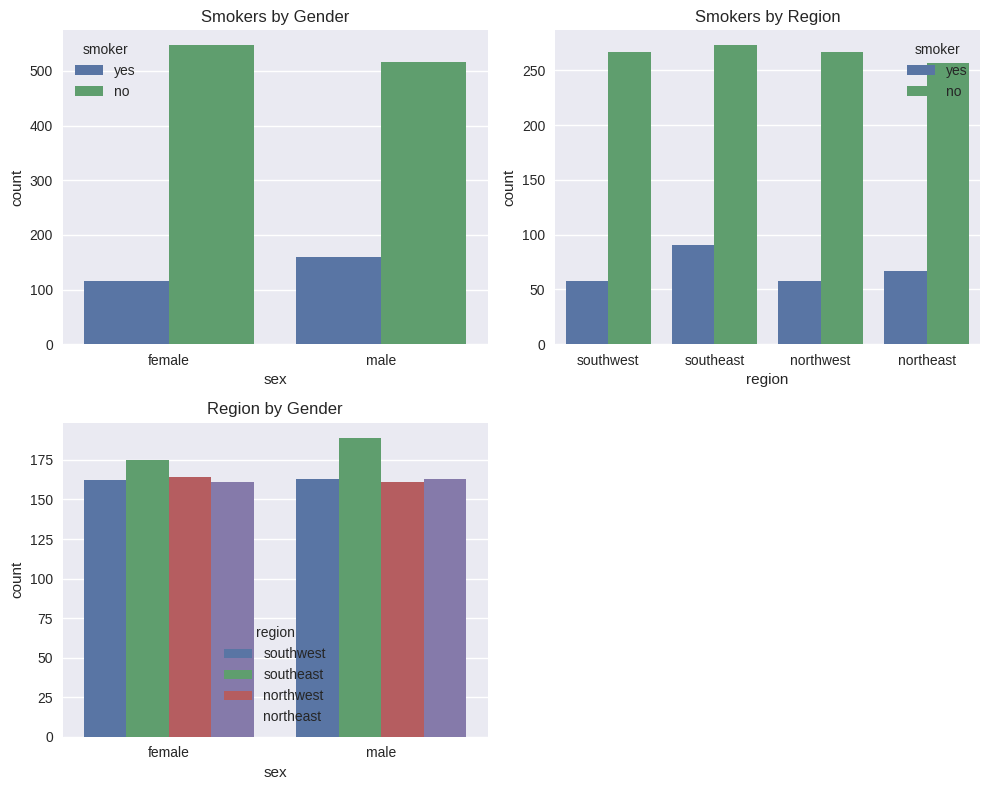

In [740]:
fig = plt.figure(figsize = (10,8))

plt.subplot(221)
plt.title('Smokers by Gender')
sns.countplot(data = df, x = 'sex', hue = 'smoker')

plt.subplot(222)
plt.title('Smokers by Region')
sns.countplot(data = df, x = 'region', hue = 'smoker')

plt.subplot(223)
plt.title('Region by Gender')
sns.countplot(data = df, x = 'sex', hue = 'region')

plt.tight_layout()
plt.show()

From this, we can see that:
- Smoking habits do not depend on gender
- Smoking habits do not depend on region
- There is an almost equal distribution of males and females from each region

### Categorical and Numeric Variables

Now, let's look at the relationship between the categorical variables, 'sex', 'smoker' and 'region', and the target variable, 'charges'.

#### Charges vs Smoker

Text(0.5, 1.0, 'Distribution of Charges by Smoker vs Non Smoker')

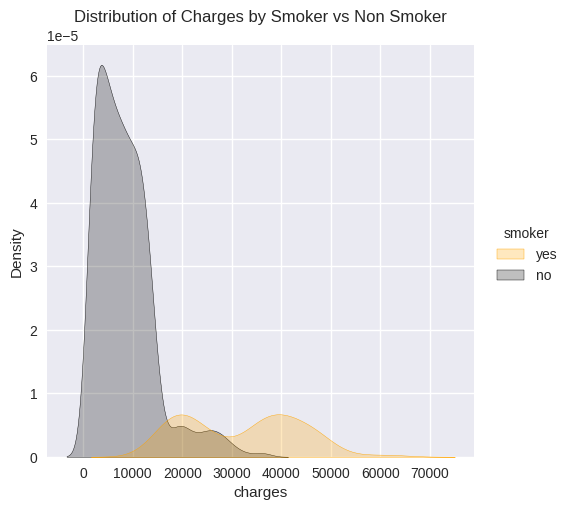

In [741]:
sns.displot(df, x="charges", hue="smoker", palette=["orange", "black"],kind="kde", fill=True)
plt.title("Distribution of Charges by Smoker vs Non Smoker")

As we can see, there is a relationship between smoking habits and insurance charges. Smokers are charged more compared to non-smokers.

#### Charges vs Gender

Text(0.5, 1.0, 'Distribution of Charges by Gender')

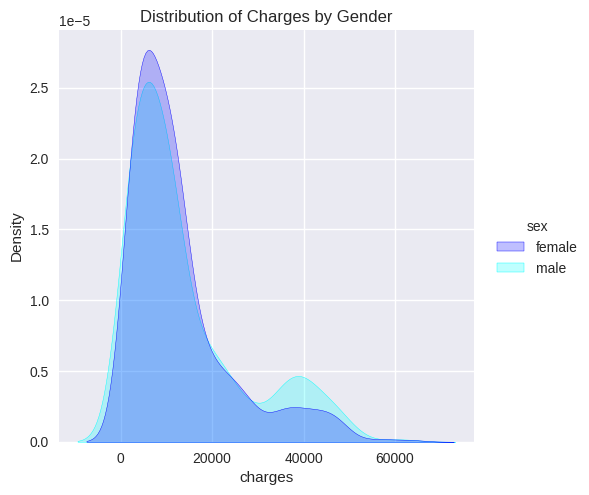

In [742]:
sns.displot(df, x="charges", hue="sex", palette=["blue", "aqua"],kind="kde", fill=True)
plt.title("Distribution of Charges by Gender")

Judging from this, charges do not depend on the customer's gender.

#### Charges vs Regions

Text(0.5, 1.0, 'Distribution of Charges by Region')

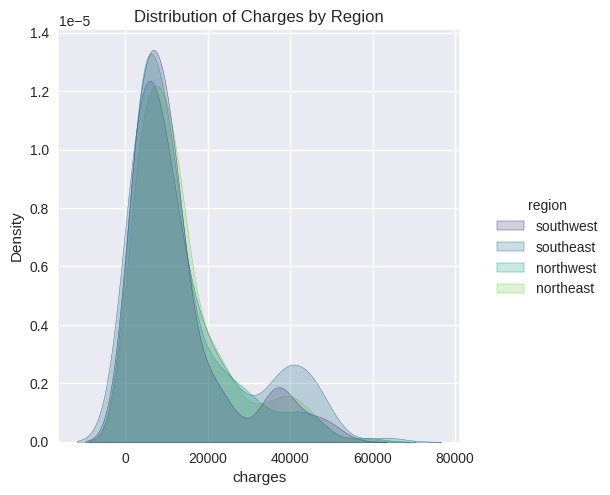

In [743]:
sns.displot(df, x="charges", hue="region", palette="viridis",kind="kde", fill=True)
plt.title("Distribution of Charges by Region")

As can be seen, there is an equal distribution from each region. And charges given to customers do not depend on customer's region.

Now, let's look at the relationship between independent variables.

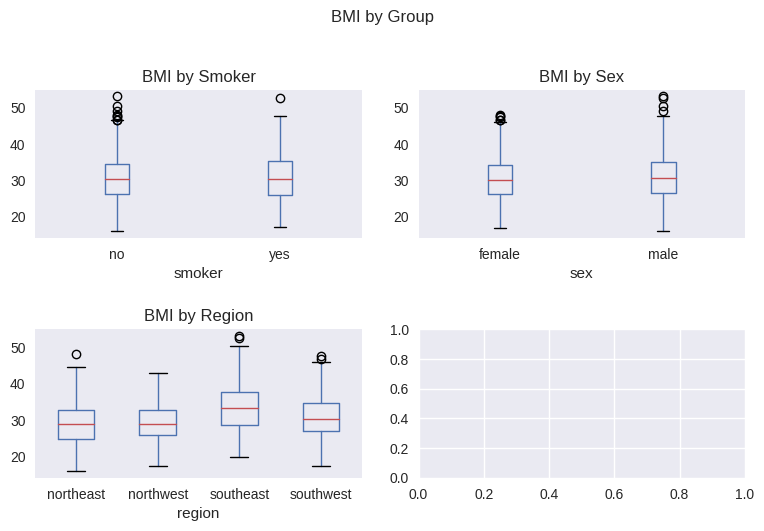

In [744]:
#fig = plt.figure(figsize = (2,2))
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.75)
df.boxplot(by="smoker", column=["bmi"], grid=False, ax=ax[0,0])
df.boxplot(by="sex", column=["bmi"], grid=False, ax=ax[0,1])
df.boxplot(by="region", column=["bmi"], grid=False, ax=ax[1,0])
ax[0,0].set_title("BMI by Smoker")
ax[0,1].set_title("BMI by Sex")
ax[1,0].set_title("BMI by Region")
fig.suptitle("BMI by Group")
fig.tight_layout(pad=2.0)

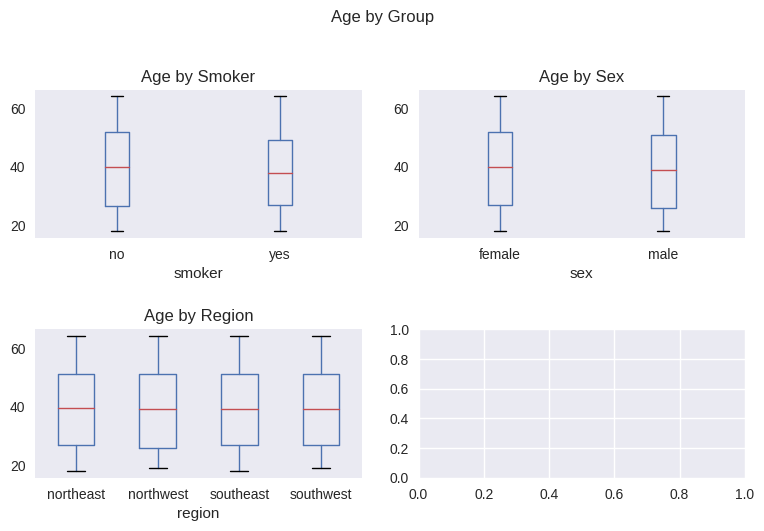

In [745]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.35)
df.boxplot(by="smoker", column=["age"], grid=False, ax=ax[0,0])
df.boxplot(by="sex", column=["age"], grid=False, ax=ax[0,1])
df.boxplot(by="region", column=["age"], grid=False, ax=ax[1,0])
ax[0,0].set_title("Age by Smoker")
ax[0,1].set_title("Age by Sex")
ax[1,0].set_title("Age by Region")
fig.suptitle("Age by Group")
fig.tight_layout(pad=2.0)

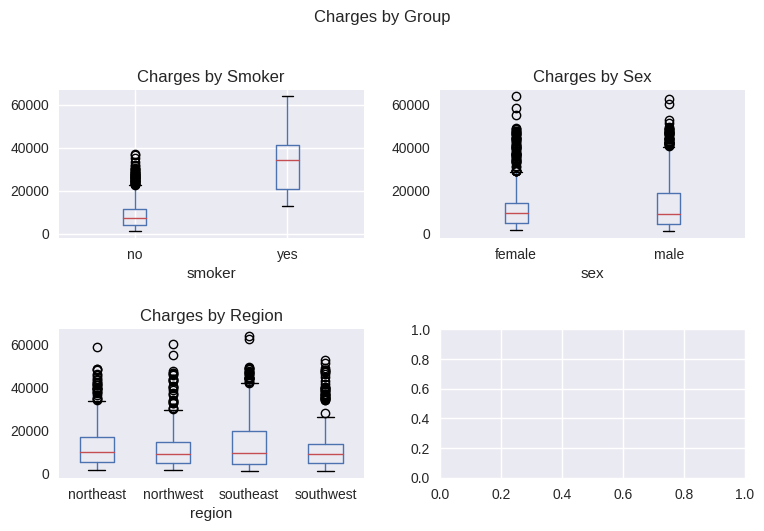

In [746]:
fig, ax = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.35)
df.boxplot(by="smoker", column=["charges"], ax=ax[0,0])
ax[0,0]
df.boxplot(by="sex", column=["charges"], grid=False, ax=ax[0,1])
df.boxplot(by="region", column=["charges"], grid=False, ax=ax[1,0])
ax[0,0].set_title("Charges by Smoker")
ax[0,1].set_title("Charges by Sex")
ax[1,0].set_title("Charges by Region")
fig.suptitle("Charges by Group")
fig.tight_layout(pad=2.0)
fig.tight_layout(pad=2.0)

From this, we can see that:
- Age has no relationship with smoking habits, sex and region
- BMI has no relationship with smoking habits and age. Customers from the Southeast seem to have a higher BMI compared to other regions.
- Smokers tend to be charged more compared to non-smokers.

## Check Linearity (Assumption 1 of Linear Regression)

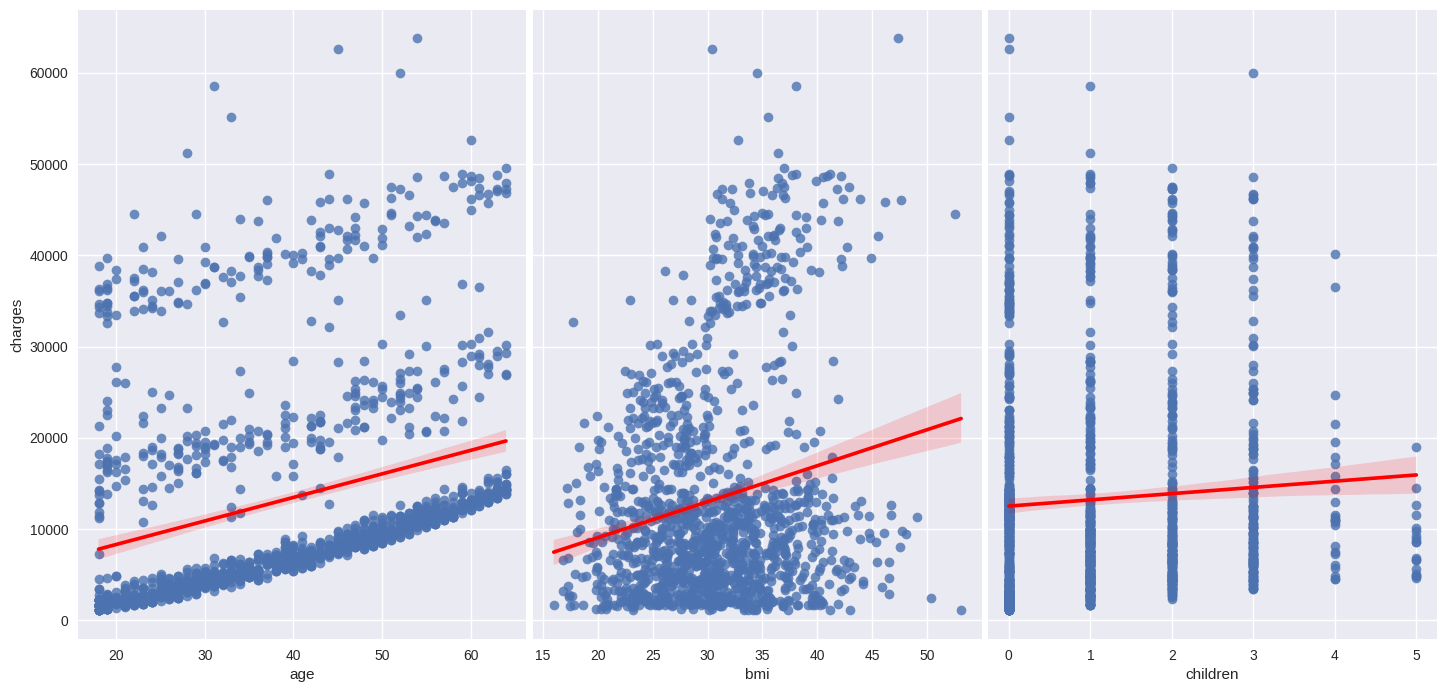

In [747]:
p = sns.pairplot(df, x_vars=['age','bmi','children'], y_vars='charges', size=7, aspect=0.7, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})

There's a linear relationship between the independent and dependent variables.

# Data Preprocessing

## Removing Outliers

In the box plot below, the upper limit for outliers is shown to be at about 35000. In the abovbelowe distribution plot it can be seen that a majority of the customers who are charged over 35000 are smokers. This shows a relationship between smoking habits and charges. For this reason, I will not be removing outliers from the charges column, as I think doing this will remove vital information

<Axes: xlabel='charges', ylabel='Count'>

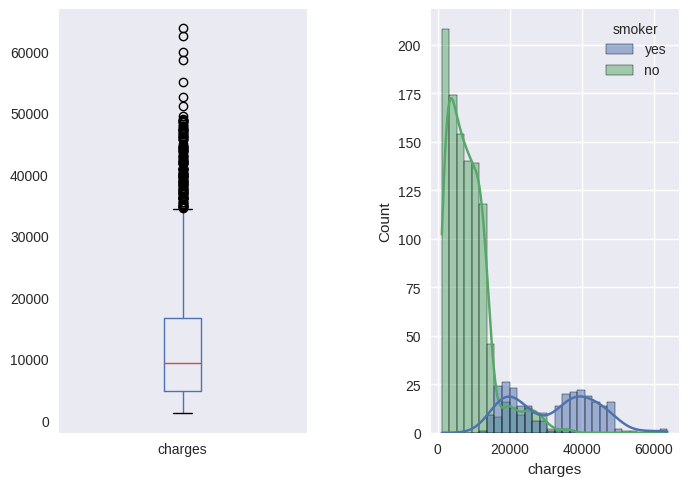

In [748]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0.5)
df.boxplot(column=["charges"], grid=False, ax=ax1)
sns.histplot(df, x="charges", color=["b","r"], hue="smoker",kde=True, fill=True, ax=ax2)

However I'll be removing outliers from BMI column. I'll do this using Interquartile Range (IQR).


The aim of the IQR is to calculate a certain upper or lower limit and remove the outliers beyond these limits. As can be seen in the below boxplot, the outliers for bmi exist in the upper limit, so we must remove those.

Text(0.5, 1.0, 'Outliers in BMI Column')

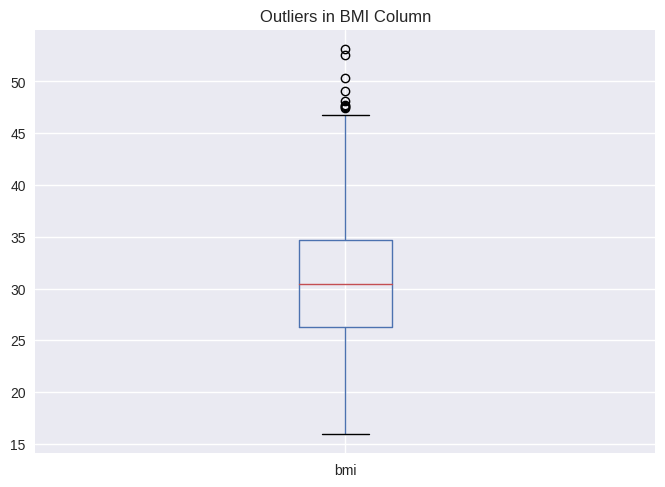

In [749]:
df.boxplot(column=["bmi"])
plt.title("Outliers in BMI Column")

Removing the outliers using IQR method

In [750]:
col = df.bmi
Q3 = np.percentile(col, 75)
Q1 = np.percentile(col, 25)
IQR = Q3 -Q1
    #Upper and lower quartile
upper = Q3 +1.5*IQR 
lower = Q1 -1.5*IQR
    #Upper and lower quartile
upper_values=np.where(col>=upper)
lower_values=np.where(col<=lower)
    #Drop values over the limits
df.drop(df[ (col >= upper) | (col <= lower) ].index , inplace=True)
print("Upper Limit:",upper)

Upper Limit: 47.290000000000006


The upper limit has been calculated to be 47.29. The outliers above this limit have been removed, as shown in the boxplot below.

<function matplotlib.pyplot.show(close=None, block=None)>

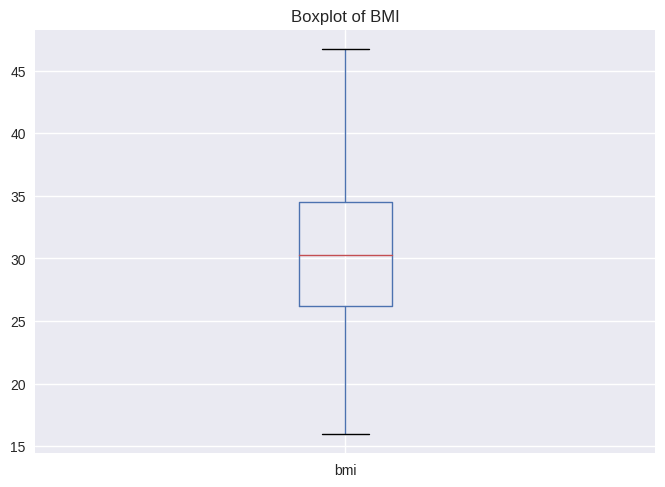

In [751]:
df.boxplot(column=['bmi'])
plt.title('Boxplot of BMI' )
plt.show

## Remove Duplicates

We can remove duplicates using .drop_duplicates() method

In [752]:
#remove duplicates
df.drop_duplicates(subset=None, keep="first", inplace=True)
df.shape

(1328, 7)

## Feature Engineering

We'll now transform the categorical data into numeric data.



### Sex, Region and Smoker


The 'sex', 'region' and 'smoker' columns are all nominal data. As a result we will make use of get_dummies(). If we had ordinal data, we would use OrdinalEncoder()

In [753]:
df_new=pd.get_dummies(df, columns=['sex', 'smoker', 'region'])


Let's take a look at the transformed data.

In [754]:
df_new.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


The new data types for 'sex', 'smoker' and 'region' are uint:

In [755]:
df_new.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

## Multicollinearity (Assumption 2 of Linear Regression)

The multicollinearity, also known as the dummy variable trap occurs because of independent variables that are multicollinear. This means that they are highly correlated to one another. Because of this, one variable can be predicted from another. 

<Axes: >

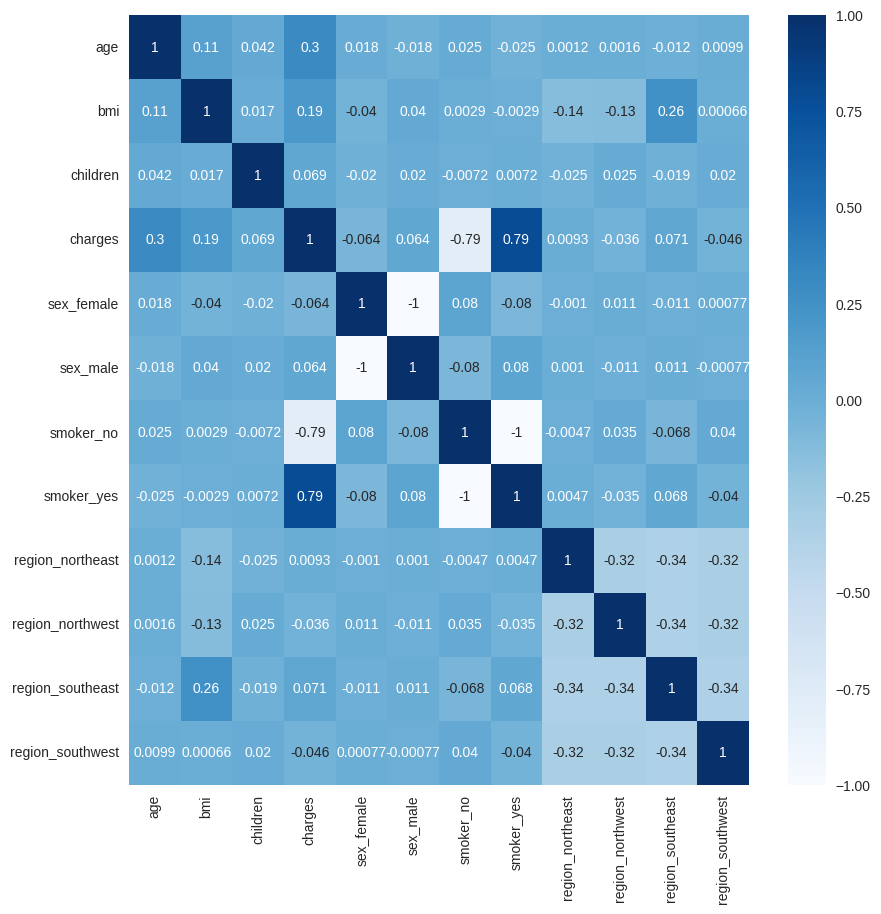

In [756]:
correl=df_new.corr()
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(correl, annot=True, cmap='Blues')



*   'smoker_yes' and 'smoker_no' are highly correlated at -1
*   'sex_female' and 'sex_male' are highly correlated at -1


*   The different regions are highly correlated to each other

To fix the dummy variable trap problem we'll have to drop one variable. So we'll be dropping 'sex_male', 'smoker_no' and 'region_southeast'





In [757]:
df_new.drop(['sex_male','smoker_no', 'region_southeast'], axis=1, inplace=True )

In [758]:
df_new.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,0
2,28,33.000,3,4449.46200,0,0,0,0,0
3,33,22.705,0,21984.47061,0,0,0,1,0
4,32,28.880,0,3866.85520,0,0,0,1,0


The multicollinear columns have been removed and now there's no more multicollinearity.

## Scale Data

Because the dataset has points far from each other, we scale data.

In [759]:
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
scaler.fit_transform(df_new)

array([[-1.4404286 , -0.44549526, -0.90856337, ..., -0.56691537,
        -0.56807496,  1.76033106],
       [-1.51166949,  0.5460678 , -0.08044247, ..., -0.56691537,
        -0.56807496, -0.56807496],
       [-0.79926057,  0.41599905,  1.57579935, ..., -0.56691537,
        -0.56807496, -0.56807496],
       ...,
       [-1.51166949,  1.06634279, -0.90856337, ..., -0.56691537,
        -0.56807496, -0.56807496],
       [-1.29794681, -0.80022821, -0.90856337, ..., -0.56691537,
        -0.56807496,  1.76033106],
       [ 1.55168884, -0.24785833, -0.90856337, ..., -0.56691537,
         1.76033106, -0.56807496]])

# Splitting Data

Using train_test_split, we'll be splitting data into four parts:


*   Independent variables of the training set
*   Dependent variable of the training set


*   Independent variables of the test set
*   Dependent variable of the test set





In [760]:
from sklearn.model_selection import train_test_split
X = df_new.drop(['charges'],axis=1)
y = df_new['charges']
(X_train, X_test, y_train, y_test)= train_test_split(X,y, test_size=0.2, random_state=42)

#Choose Algorithm

We'll import LinearRegression from sklearn

In [761]:
from sklearn.linear_model import LinearRegression

# Fit Model

We fit the training data to the model.

In [762]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

# Predict

## Train predictions

Predictions of the training set

In [763]:
train_pred = lr.predict(X_train)
np.set_printoptions(threshold=10) #Limiting the number of array items displayed 
print("Train prediction", train_pred)

Train prediction [ 4441.86054681  9505.43013272 33581.38484078 ... 30821.45134978
 16786.9707683  11605.02301863]


## Test Predictions

Predictions of the test set

In [764]:
test_pred= (lr.predict(X_test))
np.set_printoptions(threshold=10) #Limiting the number of array items displayed 
print("Test prediction:", test_pred)

Test prediction: [ 7843.14323589 13308.81064092 10449.86026386 ... 14764.93545499
 -1618.19259209 35525.65099755]


I will use the predicted values to calculate the remaining three assumptions of Linear Regression: Mean of Residuals, Heteroscendastity and Normality of Residuals.

## Mean of Residuals (Assumption 3 of Linear Regression)


Assumption of linear regression is that the mean of residuals is 0.

In [765]:
residuals = y_train-train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 2.3294026260097598e-12


Since the mean of residuals is close to zero, this model meets this assumption

## Check for Heteroscendastity (Assumption 4 of Linear Regression)

Heteroscendastity mean that the data has an unequal variance. This results in an unequal scatter.

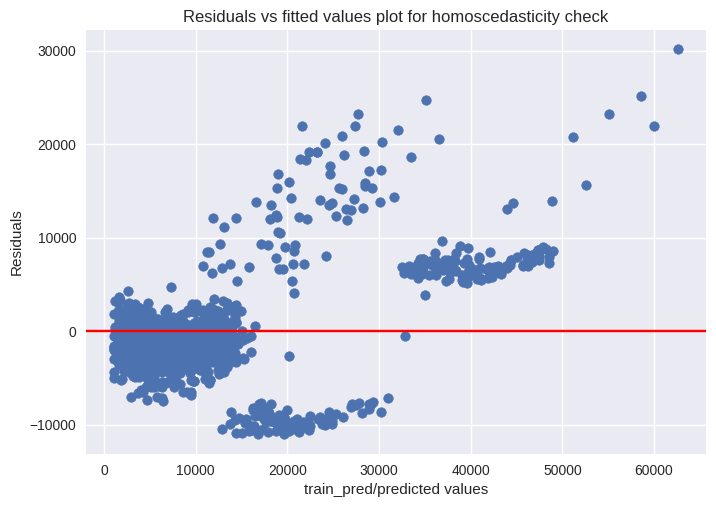

In [766]:
p = plt.scatter(y_train,residuals)
plt.xlabel('train_pred/predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

## Test for Normality of Residuals (Assumption 5 of Linear Regression)

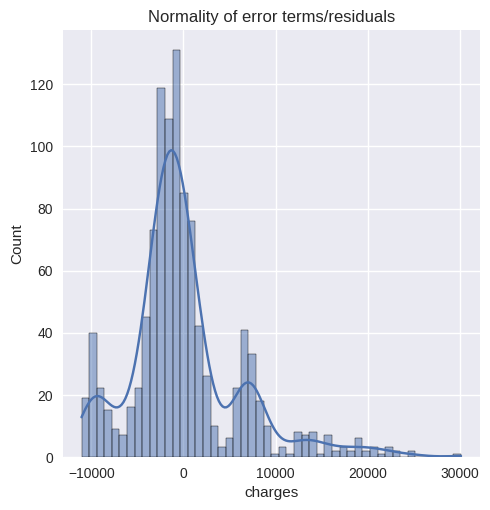

In [767]:
p = sns.displot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [768]:
residuals.skew()

1.2231882022365865

The residuals are not normally distributed. This violates the assumption of linear regression.

# Evaluate

Because I’m solving a regression problem, I will be using the following metrics to verify my model:
*   R2 Metric
*   Model Score
*   Mean Square Error (MSE)
*   Mean Absolute Error (MAE)

**R2 Metric**
This will help me understand how my data is spread around the regression line.
The R2 is a measure of the proximity of the data from the regression line. It is the measure of the data’s spread about the regression line. R2 Metric is measured on a scale of 0 to 100%. The closer the data is to the regression line, the higher the R2 metric. The more dispersed the data is from the regression line, the lower the R2 metric. A higher R2 metric implies that the model is more generalized. It’s important for the data to be close to the regression line because generalization will be more accurate when datapoints are concentrated around the regression line.

**Mean Square Error**
MSE measures the distance between each data point and the regression line. The closer the data is to the regression line, the more likely the model is to generalize. This is because the error between the actual and predicted data would be minimal.
The MSE is difficult to interpret because of it’s square value. So, instead, we use the RMSE, which shares the same units as the output variable.

**Mean Absolute Error**
Like MSE, MAE also measures the distance between each datapoint and the regression line and seeks the smallest distance between these. The difference between MSE and MAE is that while MSE calculates the distance by squaring the error, MAE calculates the distance be taking the modulus of the error. As a result MAE is less prone to being skewed by outliers as compared to MSE.







## Score

In [769]:
print("Training Accuracy:", lr.score(X_train, y_train))
print("Test Accuracy:", lr.score(X_test, y_test))

Training Accuracy: 0.7506633054306888
Test Accuracy: 0.7448498340547969


The training accuracy is slightly more than the test accuracy. Thus, it is likely that the model is possibly overfit. But, an R-squared of 0.74 means that the independent variables explain about 74% of the variation in our target variable. So, this can be considered a good model.

## Mean Square Error (MSE)

In [770]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, test_pred)
mse 

35465549.24040007

## RMSE

The MSE is difficult to interpret, so I use the RMSE

In [771]:
rmse=np.sqrt(mse)
rmse

5955.295898643498

The RMSE is likely a good value, considering that the average charges are actually 13125.47. The RMSE is sensitive to outliers, so let's take a look at Mean Absolute Error, which is less sensitive to outliers.

## Mean Absolute Error (MAE)

In [772]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, test_pred)
mae

4125.942676536798

The MAE is likely a good value, considering that the average charges are actually 13125.47

## R Square Metric

In [773]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, test_pred)
r2 #compares error between actual and predicted values 

0.7448498340547969

The higher the R2 Score, the better the model. So, as shown by this score, the model is performing quite well in terms of making predictions. 

## Slope and Intercept

The slopes and intercepts for the model are as follows:

In [774]:
lr.coef_

array([  259.03018039,   349.24138678,   529.46460959,    38.68805866,
       23743.30576635,  1302.60945429,   727.93140719,  -246.89563407])

In [775]:
lr.intercept_

-13522.16709180797

# Visualize Results

I will visualize the results of the analysis using Learning Curve and I will compare the actual and predicted results using a Distribution Plot.

## Learning Curve

(-623.0159425987174, 13083.334794573064)

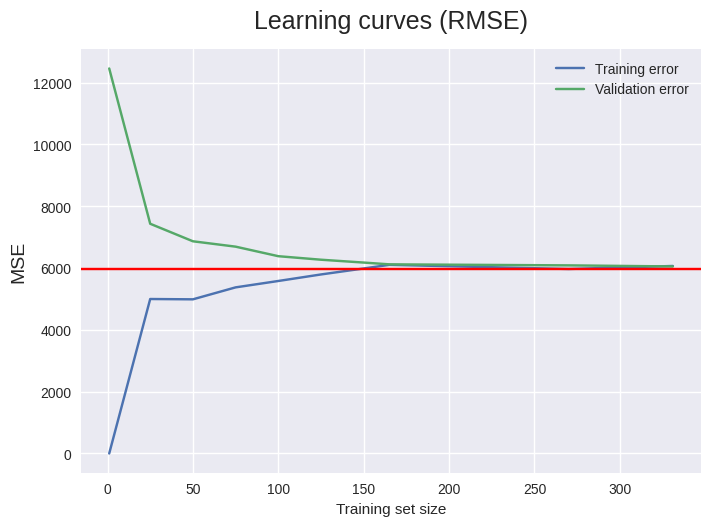

In [776]:
# Code adapted from: https://www.datacamp.com/tutorial/tutorial-learning-curves 
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(),
    X=X,
    y=y,
    cv=5,
    scoring= "neg_root_mean_squared_error",
    train_sizes = [1, 25, 50, 75, 100, 125, 150, 165, 270, 331]
)

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1 )

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Validation error')

plt.axhline(y = rmse, color = 'r', linestyle = '-')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel("Training set size")
plt.title('Learning curves (RMSE)', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim()

The gap between the two graphs is small, so it can be said that the model has low variance. The training error appears to be lower than the validation error. This implies a low bias.



## Actual vs Predicted Charges

To compare the distributions of the actual and predicted results, I'll use a kde plot

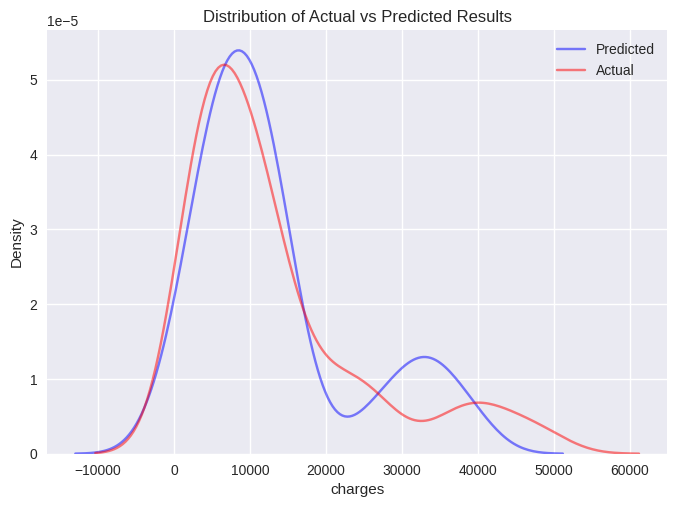

In [777]:
sns.kdeplot(test_pred, label="Predicted",fill=False, color="b",
   alpha=.5)
sns.kdeplot(y_test, label="Actual",fill=False, color="r",
   alpha=.5)
plt.title("Distribution of Actual vs Predicted Results")
plt.legend(loc="upper right")
plt.show()

There seems to be a high amount of incorrect predictions as the charges increase

# Regularization

## Lasso

Let's try to see if we can improve the model's generalization using Lasso regularization.

In [779]:
#code adapted from: https://www.dataquest.io/blog/regularization-in-machine-learning/
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.7).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.75
Lasso Regression-Test set score: 0.74


The score is round about the same as that of linear regression

## Ridge

In [780]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.75
Ridge Regression-Test set score: 0.74


The score is nearly the same as for linear regression.